In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("DatasetMamikosMachineLearning.csv")

In [3]:
data.head()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,,Putri,KMD,NaN,AC,NaN,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,,Putri,KMD,WiFi,AC,NaN,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,,Putri,KMD,WiFi,AC,NaN,Kasur


In [4]:
data.tail()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
10995,Kost Va Tipe A1 Jagakarsa Jakarta Selatan,700000,,Putra,NaN,WiFi,NaN,KD,Kasur
10996,Kost Pondok Katama Tipe B Beji Depok,900000,,Putra,NaN,WiFi,NaN,NaN,Kasur
10997,Kost Wisma Violet Beji Depok,800000,,Putri,KMD,WiFi,NaN,NaN,NaN
10998,Kost Eksklusif Mara Juara Tipe Large Bedroom B...,2499000,,Campur,KMD,WiFi,AC,KD,Kasur
10999,Kost Giyan Exclusive Tipe Reguler Beji Depok,1100000,,Campur,KMD,NaN,AC,KD,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nama               11000 non-null  object
 1   harga              11000 non-null  int64 
 2    rating            11000 non-null  object
 3   jenis              11000 non-null  object
 4   Kamar Mandi Dalam  9976 non-null   object
 5   Wifi               8118 non-null   object
 6   AC                 5816 non-null   object
 7   Kloset Duduk       7182 non-null   object
 8   Kasur              10702 non-null  object
dtypes: int64(1), object(8)
memory usage: 773.6+ KB


In [6]:
data.shape

(11000, 9)

In [7]:
# mencari data kosong
data.isnull().sum()

nama                    0
harga                   0
 rating                 0
jenis                   0
Kamar Mandi Dalam    1024
Wifi                 2882
AC                   5184
Kloset Duduk         3818
Kasur                 298
dtype: int64

In [8]:
## mengisi nilai kosong dengan "0" pada data
data.fillna('0',axis=0,inplace=True)

In [9]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
 rating              object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

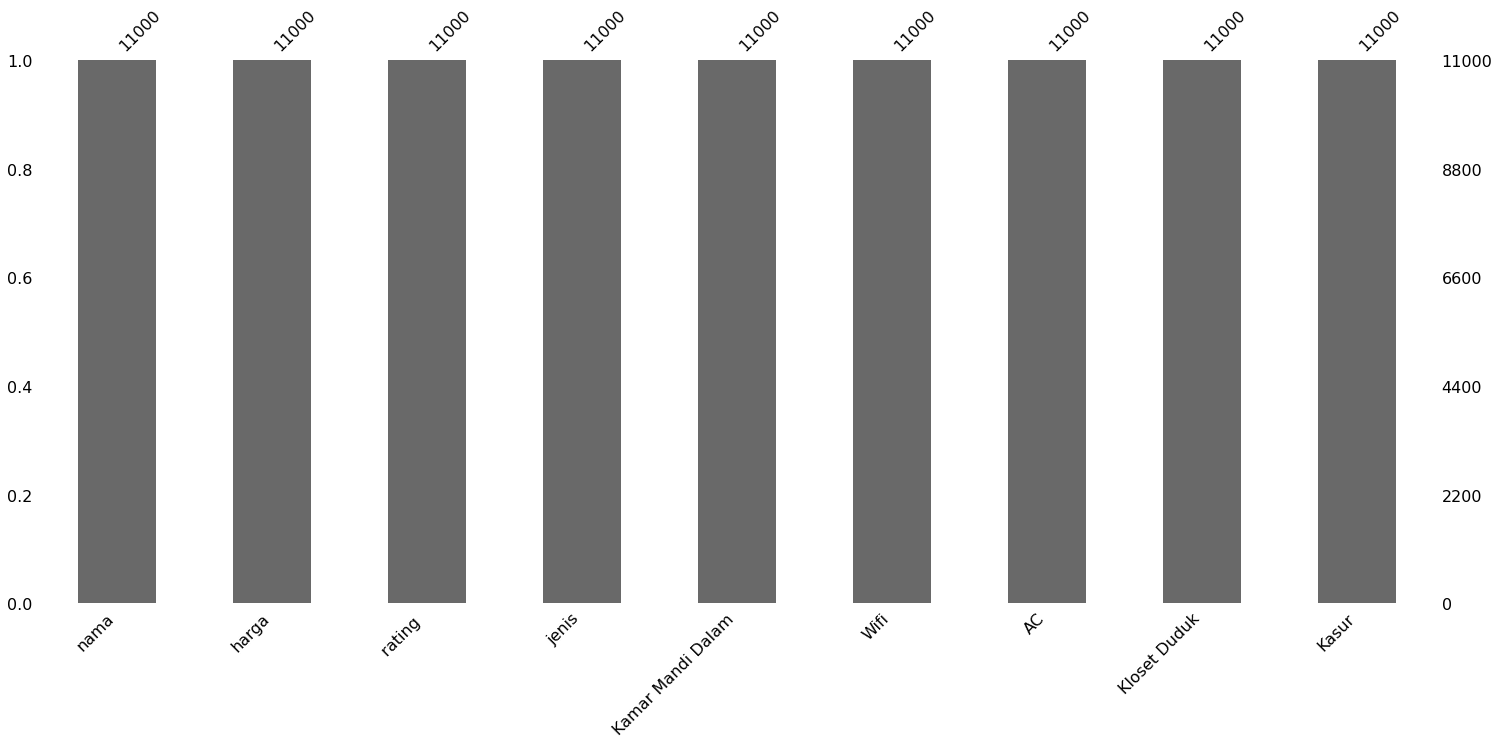

In [10]:
import missingno as msno
msno.bar(data)
plt.show

In [11]:
# mencari data kosong
data.isnull().sum()

nama                 0
harga                0
 rating              0
jenis                0
Kamar Mandi Dalam    0
Wifi                 0
AC                   0
Kloset Duduk         0
Kasur                0
dtype: int64

In [12]:
data.head(10)

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,,Putri,KMD,0,AC,0,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,,Putri,KMD,WiFi,AC,0,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,,Putri,KMD,WiFi,AC,0,Kasur
5,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50,Campur,KMD,WiFi,0,0,Kasur
6,Kost Apik Griya Osfa UI Tipe A Beji Depok,1368000,,Putri,KMD,WiFi,AC,0,Kasur
7,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47,Putri,KMD,WiFi,0,0,Kasur
8,Kost Singgahsini Alhidayah EMH-4 Tipe B Beji ...,1249500,,Putri,KMD,WiFi,AC,0,Kasur
9,Kost Apik The Cozy Dorms Kukusan Beji Depok,1278000,,Campur,KMD,0,AC,0,Kasur


# Data Cleaning

In [13]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
 rating              object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [14]:
data.columns

Index(['nama', 'harga', ' rating ', 'jenis', 'Kamar Mandi Dalam', 'Wifi', 'AC',
       'Kloset Duduk', 'Kasur'],
      dtype='object')

In [15]:
# mengubah nama kolom pada Dataset ke dalam bahasa Indonesia
data=data.rename(columns = {"Kamar Mandi Dalam": "Kamar_Mandi_Dalam", "Kloset Duduk": "Kloset_Duduk"})

In [16]:
data = data[data.duplicated()]
print(data.shape)

(9089, 9)


In [17]:
data.drop_duplicates()

,nama,harga,rating,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,,Putri,KMD,0,AC,0,Kasur
21,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,,Putri,KMD,WiFi,AC,0,Kasur
22,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,,Putri,KMD,WiFi,AC,KD,Kasur
25,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50,Campur,KMD,WiFi,0,0,Kasur
27,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47,Putri,KMD,WiFi,0,0,Kasur
...,...,...,...,...,...,...,...,...,...
10930,Kost Samitra Tipe A Cimanggis Depok,1350000,,Putra,KMD,WiFi,AC,0,Kasur
10932,Kost Rumah Samara Kelapa Dua Depok,1350000,50,Putra,KMD,WiFi,0,KD,Kasur
10955,Kost Kosisti Pondok Cina Beji Depok,700000,44,Putri,KMD,WiFi,0,0,Kasur
10967,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,50,Putri,KMD,WiFi,AC,KD,Kasur


In [18]:
data.shape

(9089, 9)

In [19]:
## menghapus kolom nama karena tidak dibutuhkan dalam pembuatan model.
data.drop('nama',axis=1,inplace=True)

In [20]:
## menghapus kolom rating karena tidak dibutuhkan dalam pembuatan model.
data.drop(' rating ',axis=1,inplace=True)

In [21]:
data.head()

,harga,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,1143000,Putri,KMD,0,AC,0,Kasur
21,1323000,Putri,KMD,WiFi,AC,0,Kasur
22,1683000,Putri,KMD,WiFi,AC,KD,Kasur
25,1008000,Campur,KMD,WiFi,0,0,Kasur
27,1008000,Putri,KMD,WiFi,0,0,Kasur


# Exploratory Data Analysis

In [22]:
data.jenis.value_counts()

Putri     4425
Campur    2797
Putra     1867
Name: jenis, dtype: int64

In [23]:
data.Kamar_Mandi_Dalam.value_counts()

KMD    8278
0       811
Name: Kamar_Mandi_Dalam, dtype: int64

In [24]:
data.Wifi.value_counts()

WiFi    6813
0       2276
Name: Wifi, dtype: int64

In [25]:
data.AC.value_counts()

AC    4952
0     4137
Name: AC, dtype: int64

In [26]:
data.Kloset_Duduk.value_counts()

KD    6124
0     2965
Name: Kloset_Duduk, dtype: int64

In [27]:
data.Kasur.value_counts()

Kasur    8851
0         238
Name: Kasur, dtype: int64

# Data Pre-Processing

In [28]:
#identifikasi Atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9089 entries, 20 to 10999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   harga              9089 non-null   int64 
 1   jenis              9089 non-null   object
 2   Kamar_Mandi_Dalam  9089 non-null   object
 3   Wifi               9089 non-null   object
 4   AC                 9089 non-null   object
 5   Kloset_Duduk       9089 non-null   object
 6   Kasur              9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 568.1+ KB


In [29]:
from pandas import DataFrame

In [30]:
def preprocess_data(
    df: DataFrame,
    one_hot_cols: [str],
    standardized_cols: [str],
    scaler: StandardScaler,
    
):
  result_df = df.copy()
  result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
  result_df, _ = standardize_attributes(result_df, standardized_cols, scaler)
  return result_df


In [31]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
one_hot_cols = (list(set(object_cols)))

In [32]:
object_cols = list(s[s].index)
object_cols

['jenis', 'Kamar_Mandi_Dalam', 'Wifi', 'AC', 'Kloset_Duduk', 'Kasur']

In [33]:
#one_hot_encoding kategori
def encode_multivalued_attributes_with_one_hot_encoding(
    df: DataFrame, col_names: [str]
):
  result_df = df.copy()
  for col_name in col_names:
    one_hot_values_df = pd.get_dummies(result_df[col_name], prefix=col_name, drop_first=True)
    result_df = pd.concat([result_df, one_hot_values_df], axis=1)
    result_df = result_df.drop(col_name, axis=1)
    
  return result_df


In [34]:
one_hot_cols

['AC', 'jenis', 'Wifi', 'Kasur', 'Kloset_Duduk', 'Kamar_Mandi_Dalam']

In [35]:
data_preProcess=encode_multivalued_attributes_with_one_hot_encoding(data, one_hot_cols)

In [36]:
data_preProcess.head(5)

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
20,1143000,1,0,1,0,1,0,1
21,1323000,1,0,1,1,1,0,1
22,1683000,1,0,1,1,1,1,1
25,1008000,0,0,0,1,1,0,1
27,1008000,0,0,1,1,1,0,1


In [37]:
data_preProcess.tail(5)

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
10995,700000,0,1,0,1,1,1,0
10996,900000,0,1,0,1,1,0,0
10997,800000,0,0,1,1,0,0,1
10998,2499000,1,0,0,1,1,1,1
10999,1100000,1,0,0,0,0,1,1


In [38]:
data.harga.describe()

count    9.089000e+03
mean     1.271204e+06
std      5.163714e+05
min      3.500000e+05
25%      8.500000e+05
50%      1.233000e+06
75%      1.548000e+06
max      3.035000e+06
Name: harga, dtype: float64

In [39]:
# normalisasi data numerik
def standardize_attributes(df: DataFrame, col_names: [str], scaler: StandardScaler = None):
  result_df = df.copy()
  
  if not scaler:
    scaler = StandardScaler()
    scaler.fit(result_df[col_names])
  
  result_df[col_names] = scaler.transform(result_df[col_names])    
  
  return result_df, scaler

In [40]:
numeric_cols=(list(set(data) - set(object_cols)))

In [41]:
numeric_cols

['harga']

In [42]:
standardized_cols = numeric_cols

In [43]:
standardized_cols

['harga']

In [44]:
data_preProcess=standardize_attributes(data_preProcess, standardized_cols)

In [45]:
data_preProcess

(          harga  AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  \
 20    -0.248292      1            0            1          0            1   
 21     0.100314      1            0            1          1            1   
 22     0.797525      1            0            1          1            1   
 25    -0.509746      0            0            0          1            1   
 27    -0.509746      0            0            1          1            1   
 ...         ...    ...          ...          ...        ...          ...   
 10995 -1.106248      0            1            0          1            1   
 10996 -0.718909      0            1            0          1            1   
 10997 -0.912579      0            0            1          1            0   
 10998  2.377870      1            0            0          1            1   
 10999 -0.331570      1            0            0          0            0   
 
        Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD  
 20                   0  

In [46]:
prep_data, new_scaler = standardize_attributes(data, standardized_cols)
new_scaler

StandardScaler()

In [47]:
prep_data = preprocess_data(data, one_hot_cols, standardized_cols, new_scaler)   # Hasil Preprocessing: prep_data
prep_data.shape

(9089, 8)

In [48]:
prep_data.head()

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
20,-0.248292,1,0,1,0,1,0,1
21,0.100314,1,0,1,1,1,0,1
22,0.797525,1,0,1,1,1,1,1
25,-0.509746,0,0,0,1,1,0,1
27,-0.509746,0,0,1,1,1,0,1


In [49]:
prep_data.describe()

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
count,9.089000e+03,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000
mean,1.430623e-16,0.544834,0.205413,0.486852,0.749587,0.973815,0.673781,0.910771
std,1.000055e+00,0.498013,0.404025,0.499855,0.433274,0.159695,0.468854,0.285089
min,-1.784093e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.157439e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,-7.398883e-02,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,5.360708e-01,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.415940e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Penjelasan output statistika deskriptif

count = banyaknya data

mean = rata2

std = standar deviasi

min = nilai minimum

25% = artinya Kuartil ke-1

50% = artinya median atau kuartil ke-2

75% = artinya kuartil ke-3

max = nilai maksimum

[]

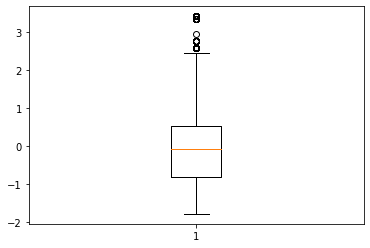

In [50]:
#boxplot with mathplotlib, melihat outlier yang dapat terjadi
plt.boxplot(prep_data.harga)
plt.plot()

Mengatasi Outlier

Setelah kita mengetahui outlier harga, selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:

Gunakan hasil dari pengolahan di tahap sebelumnya 'data' untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk mereplace nilai. Tentukan:
Nilai Minimum dan Maximum data di tolerir
Ubah Nilai yg di luar Range Minumum & Maximum ke dalam nilai Minimum dan Maximum

In [51]:
# Handling with IQR
Q1 = (prep_data[['harga']]).quantile(0.25)
Q3 = (prep_data[['harga']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (prep_data > maximum)
lower_than = (prep_data < minimum)
prep_data = prep_data.mask(more_than, maximum, axis=1)
prep_data = prep_data.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(prep_data[['harga']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
harga    2.563793
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
harga   -2.843466
dtype: float64

Persebaran data setelah ditangani Outlier: 
             harga
count  9089.000000
mean     -0.010220
std       0.969182
min      -1.784093
25%      -0.815744
50%      -0.073989
75%       0.536071
max       2.563793


In [52]:
prep_data.shape

(9089, 8)

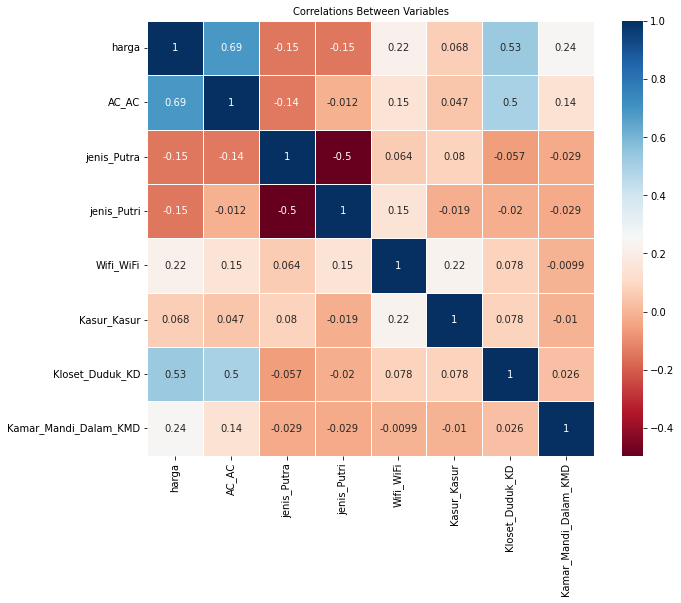

In [53]:
plt.figure (figsize=(10,8))
sns.heatmap(prep_data.corr(), annot=True, linewidth=.5, cmap= "RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

In [54]:
numeric_cols = prep_data.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[-5:])

The Most Correlated Features with Harga:
harga                    1.000000
AC_AC                    0.688750
Kloset_Duduk_KD          0.528273
Kamar_Mandi_Dalam_KMD    0.240836
Wifi_WiFi                0.215537
Kasur_Kasur              0.067922
jenis_Putri             -0.146336
jenis_Putra             -0.149623
Name: harga, dtype: float64 

The Most Uncorrelated Features with Harga:
Kamar_Mandi_Dalam_KMD    0.240836
Wifi_WiFi                0.215537
Kasur_Kasur              0.067922
jenis_Putri             -0.146336
jenis_Putra             -0.149623
Name: harga, dtype: float64


(None, None)

In [55]:
prep_data[['harga']].describe()

,harga
count,9089.000000
mean,-0.010220
std,0.969182
min,-1.784093
25%,-0.815744
50%,-0.073989
75%,0.536071
max,2.563793


In [56]:
#mengimplementasikan train/test
from sklearn.model_selection import train_test_split

In [57]:
X = prep_data.drop(['harga'], axis = 1)
y = prep_data['harga']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# untuk mengatasi pengulangan proses hasil running yang berubah-ubah
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [60]:
print(X_train)

       AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  \
10862      1            0            0          1            1   
1042       0            0            1          0            0   
6927       1            1            0          1            1   
9695       0            0            1          1            1   
7574       1            1            0          1            1   
...      ...          ...          ...        ...          ...   
3297       0            0            0          1            1   
10874      1            0            1          1            1   
7799       1            0            0          1            1   
2084       1            0            0          1            1   
7307       0            1            0          1            1   

       Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD  
10862                0                      0  
1042                 0                      1  
6927                 1                      1  
9695           

In [61]:
print(X_test)

      AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  \
2679      1            0            0          0            1   
4623      1            0            1          1            1   
2180      0            0            0          0            1   
9865      0            0            1          1            1   
9507      1            0            1          1            1   
...     ...          ...          ...        ...          ...   
8215      1            0            1          1            1   
7709      1            0            1          1            1   
9415      0            0            0          0            0   
4128      1            1            0          0            1   
1882      1            0            1          1            1   

      Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD  
2679                1                      1  
4623                1                      1  
2180                1                      1  
9865                0          

In [62]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [63]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [64]:
from sklearn.model_selection import cross_val_score

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,0.448707
MSE_li_reg,0.358609
RMSE_li_reg,0.598840


In [68]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.78967314 0.78076477 0.76723718 0.79043483 0.77016271]


In [69]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.6187387911371014

# Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [72]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg],
    index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,0.400611
MSE_tree_reg,0.292727
RMSE_tree_reg,0.541043


In [73]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82289144 0.82348561 0.80689687 0.83132465 0.81310803]


In [74]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6887819191552271

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [77]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], 
    index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,0.400311
MSE_forest_reg,0.292585
RMSE_forest_reg,0.540911


In [78]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82282935 0.82341097 0.80679391 0.83141989 0.81294775]


In [79]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.6889336692704102